In [127]:
from libka import *
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema
import sys
sys.path.append('..')


In [128]:
temp = []
signal = []
temp, signal = file_loader("./in/zad1_dta_1.txt")
print(temp)
print(signal)

[100.04 100.13 100.21 ... 546.65 546.73 546.81]
[-1.0906 -1.0905 -1.0904 ... -1.9777 -1.9798 -1.9836]


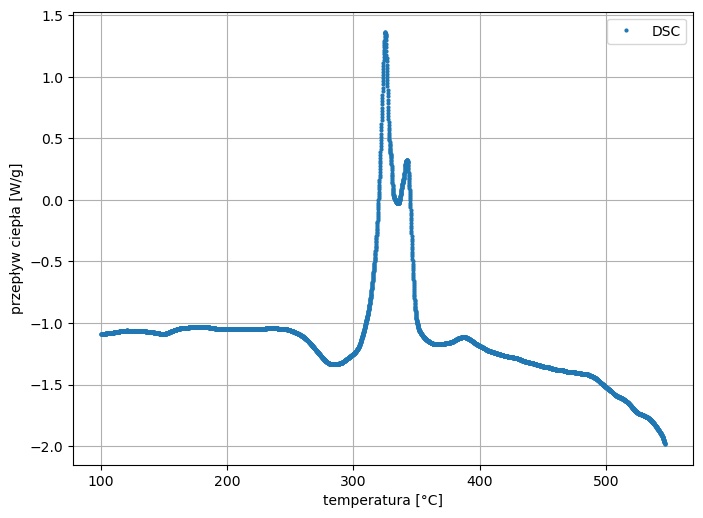

In [129]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
# ax.set_title('Zależność potencjału od odległości')
ax.set_xlabel('temperatura [°C]')
ax.set_ylabel('przepływ ciepła [W/g]') #jednostki!!!
ax.grid(True)
ax.plot(temp, signal, 'o', markersize=2,label='DSC')
plt.legend()
plt.show()

In [130]:
#przejscie szkliste krsytalizacje krystalizacja i topnienie
#tylko jak to zaznaczyć na wykresie?

#Przejście szkliste nie widac wyraznie


#Przejście krystalizacji jest jeden szczyt dla T_cmax
T_cmax = temp[np.where(signal == max(signal))][0]

# print("T_cmax = ", T_cmax)
    
#Przejście topnienia nie widac wyraznie minimum T_m 
T_m = np.where(signal == 280)

print("T_m = ",)

T_m = 


In [131]:
def lineFromPoints(P, Q):

	a = Q[1] - P[1]
	b = P[0] - Q[0]
	c = a*(P[0]) + b*(P[1])

	if(b < 0):
		print("The line passing through points P and Q is:",
			a, "x - ", b, "y = ", c, "\n")
	else:
		print("The line passing through points P and Q is: ",
			a, "x + ", b, "y = ", c, "\n")


#dla 1 przejscia


lineFromPoints((temp[1600], signal[1600]), (temp[2000], signal[2000]))




The line passing through points P and Q is: -0.13480000000000003 x -  -33.31999999999999 y =  3.2578319999999827 



267.63364616419267
325.09814532272645
313.96841135287485


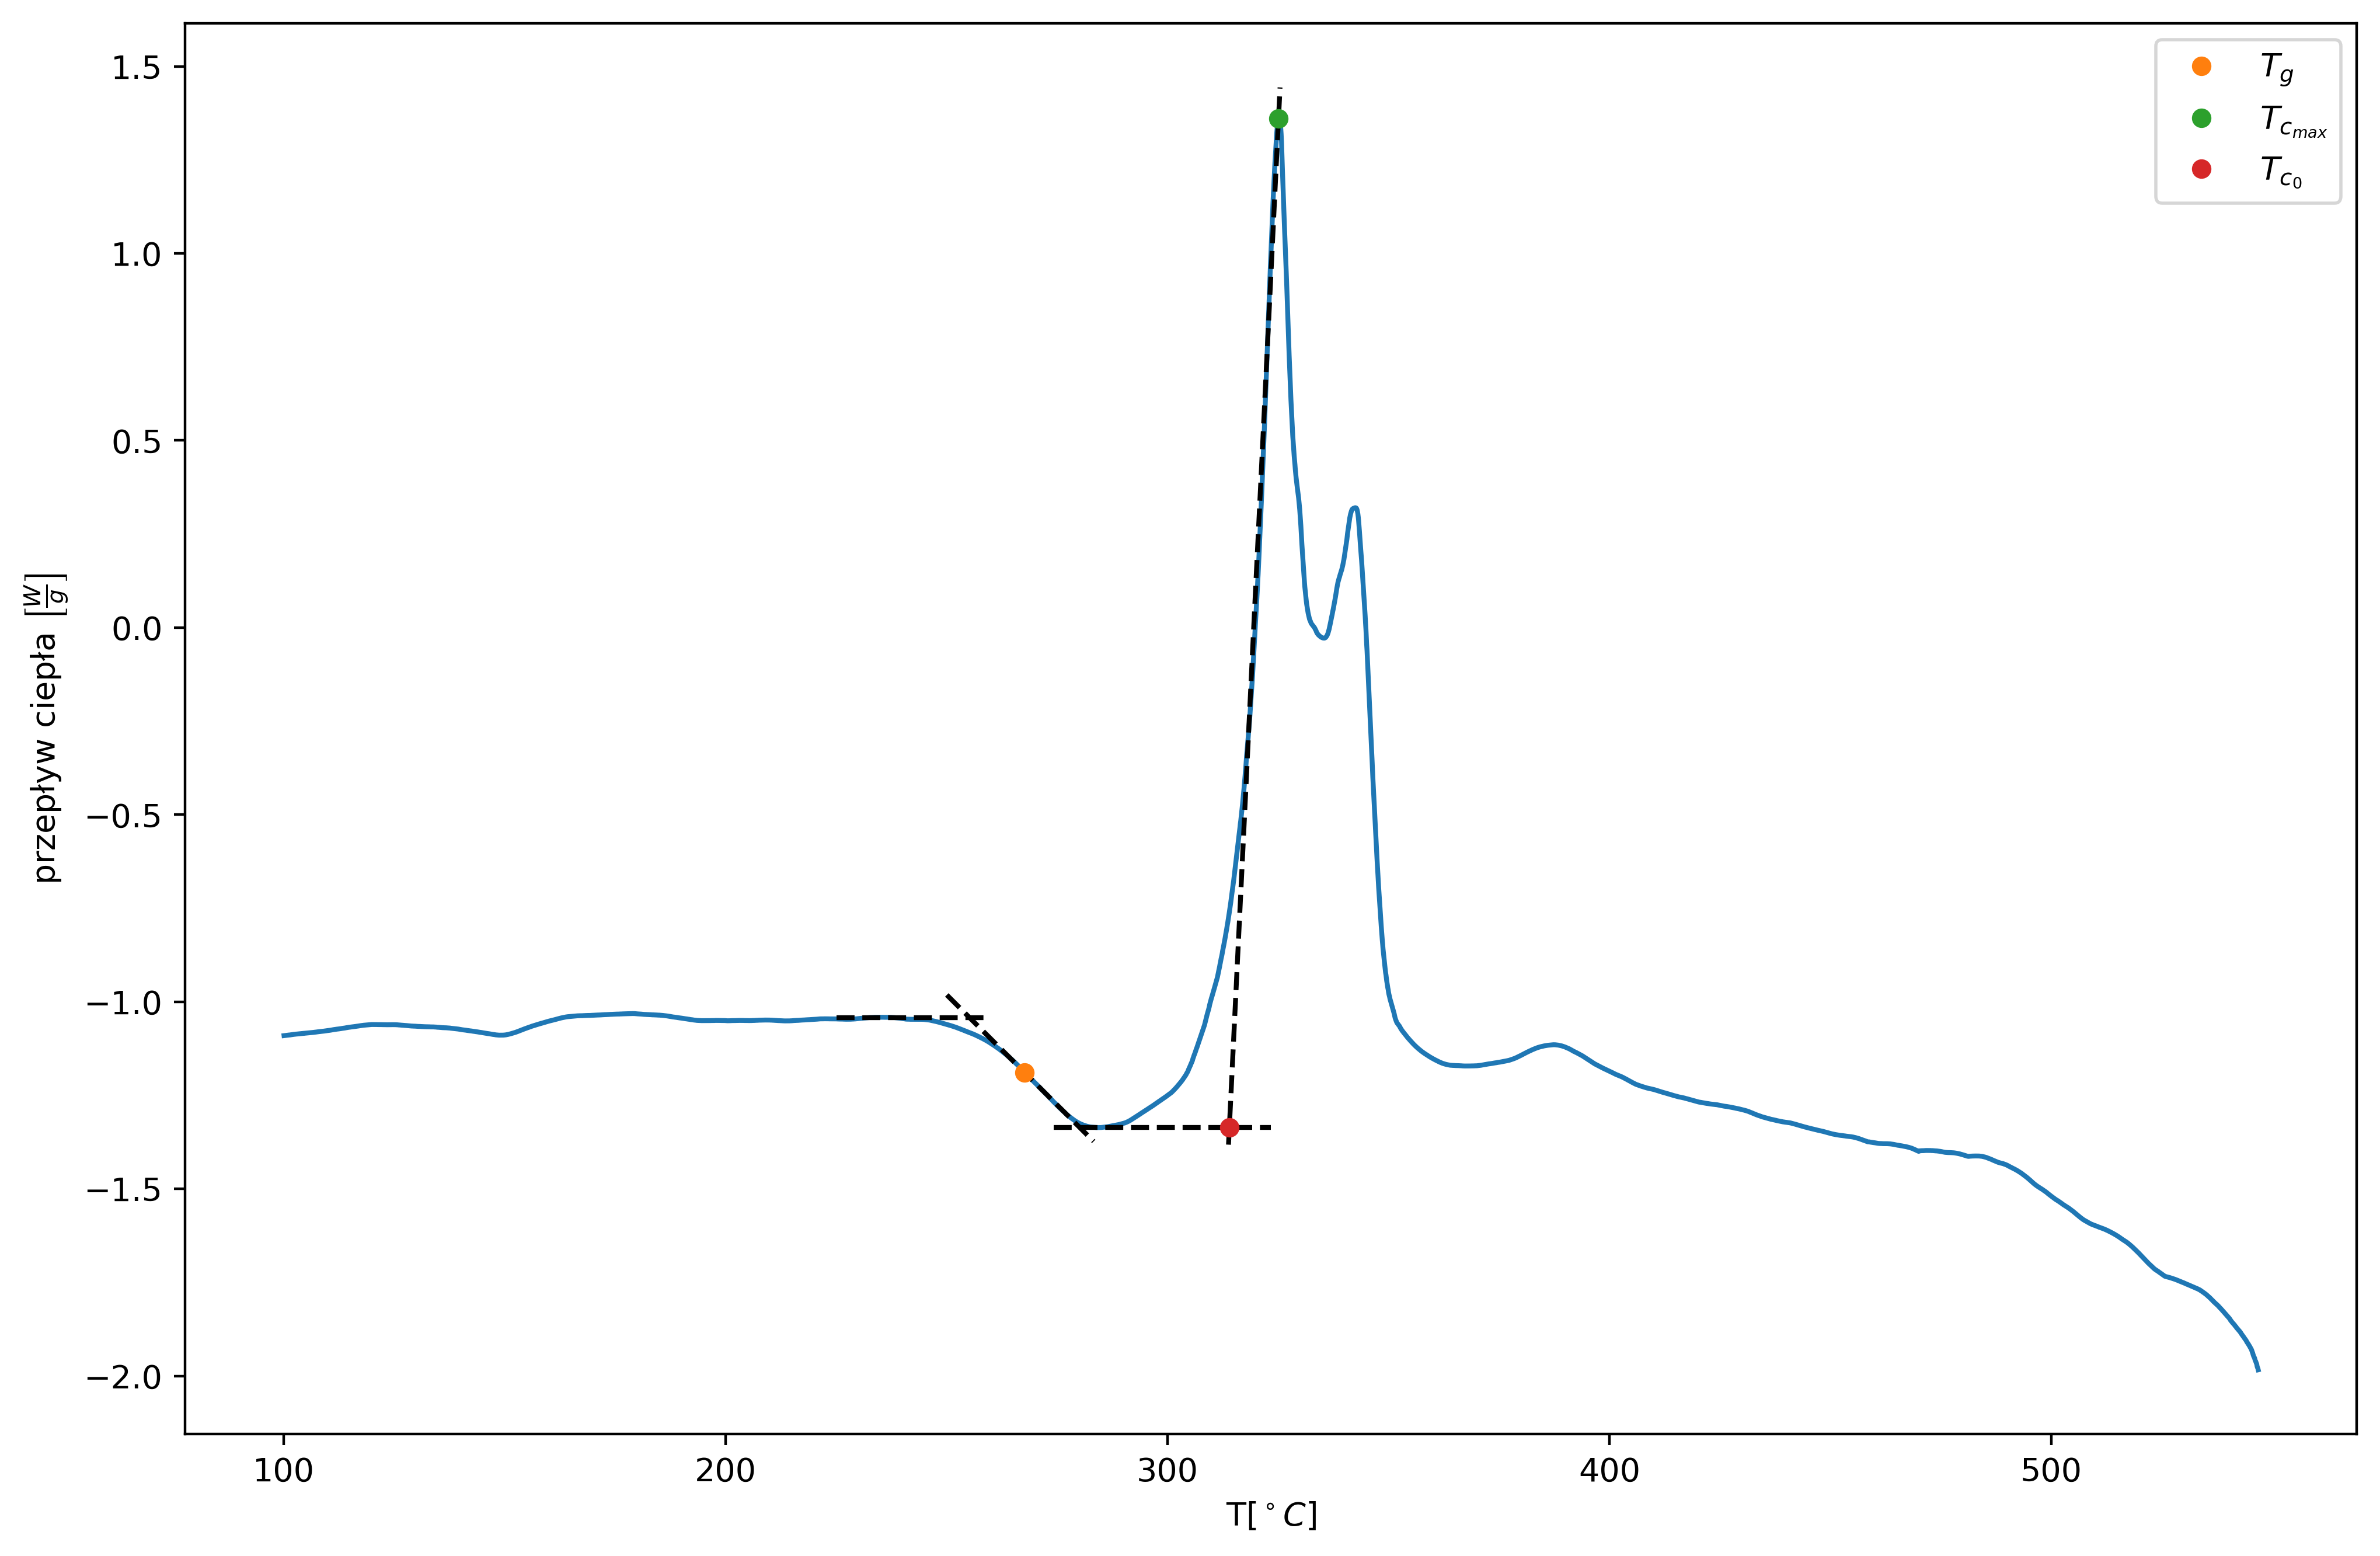

In [132]:


fig, ax = plt.subplots(figsize=(12,8), dpi=400)
# ax.set_title('Zależność potencjału od odległości')
ax.set_xlabel(r'T$[^\circ C]$')
ax.set_ylabel(r'przepływ ciepła $\left[\frac{W}{g}\right]$') #jednostki!!!
ax.plot(temp, signal)

a1, b1 = np.polyfit(temp[1950:2100], signal[1950:2100], 1)

ax.plot(temp[1800:2200], a1*temp[1800:2200]+b1,  color='black', linestyle='--')

a2, b2= np.polyfit(temp[2600:2700], signal[2600:2700], 1)

ax.plot(temp[2565:2705], a2*temp[2565:2705]+b2, color='black', linestyle='--')


ytgp=max(signal[1200:1600])
ytgk=min(signal[1400:2600])
ytc0=ytgk
ytc=max(signal)
ax.axhline(ytgp ,xmin=0.3, xmax=0.37, color='black', linestyle='--')
ax.axhline(ytgk, xmin=0.4, xmax=0.5, color='black', linestyle='--')


tgp =(ytgp-b1)/a1
tgk =(ytgk-b1)/a1
tg = (tgp+tgk)/2

tc = (ytc-b2)/a2
t0c = (ytc0-b2)/a2


print(tg)
print(tc)
print(t0c)

ax.plot(tg, (ytgp+ytgk)/2, 'o',  markersize=5, label="$T_g$")
# plt.text(tg, (ytgp+ytgk)/2, r'$T_g$', fontsize=12, horizontalalignment='right', verticalalignment='top')
# ax.plot(tgp, ytgp, 'o', color='c', markersize=5)
# plt.text(tgp, ytgp, r'$T_{gp}$', fontsize=12)
# ax.plot(tgk, ytgk, 'o', color='c', markersize=5)
# plt.text(tgk, ytgk, r'$T_{gk}$', fontsize=12, verticalalignment='top')
ax.plot(tc, ytc, 'o', markersize=5, label="$T_{c_{max}}$")
# plt.text(tc, ytc, r'$T_c$', fontsize=12)
ax.plot(t0c, ytc0, 'o', markersize=5, label="$T_{c_0}$")
# plt.text(t0c, ytc0, r'$T_{0c}$', fontsize=12)
plt.legend()
fig.savefig('zad3.jpg', dpi=500)
plt.show()

